In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"D:\archive(2)\insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [ ]:
data.head()

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot = True)

In [ ]:
sns.scatterplot(x='age', y='charges', data = data, hue="smoker")

In [ ]:
sns.distplot(data[data.smoker == 0]['charges'], color = 'green')
sns.distplot(data[data.smoker != 0]['charges'], color = 'red')

In [ ]:
sns.distplot(data.charges)

In [ ]:
sns.scatterplot(x = 'age', y = np.log10(data.charges), data= data, hue= 'smoker')

In [ ]:
print(data[data.smoker == 0]['charges'])

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x = 'age', hue = 'smoker', data = data)

In [ ]:
sns.boxplot(data.charges)

In [41]:
from sklearn.preprocessing import PolynomialFeatures

x = data.drop(['charges'], axis = 1)
y = data['charges']

poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)



## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state = 1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
r2_score(y_test, pred)

In [ ]:
pred = model.predict(x)
r2_score(y, pred)

## Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)
rd = Ridge(alpha=0.01)
rd.fit(x_train, y_train)
pred = rd.predict(x_test)
r2_score(y_test, pred)

In [74]:
x = data[data.smoker == 0]['age']
y = data[data.smoker == 0]['charges']

x = np.array(x)
x = x.reshape((-1,1))

y = np.array(y)
y = y.reshape((-1,1))

In [75]:
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)
rd = Ridge(alpha=0.01)
rd.fit(x_train, y_train)
pred = rd.predict(x_test)
r2_score(y_test, pred)

0.720316096060643

In [76]:
Pred = rd.predict(x)
r2_score(y, Pred)

0.42500814689143207

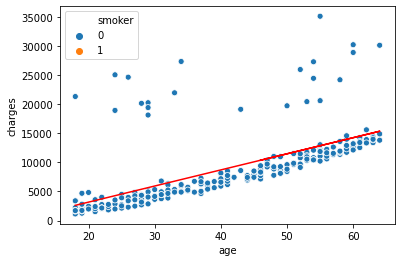

In [77]:
sns.scatterplot(x=data[data.smoker == 0]['age'], y=data[data.smoker == 0]['charges'], data = data, hue="smoker")
plt.plot(data[data.smoker == 0]['age'], rd.predict(x), 'r')
# plt.plot(x,np.sort(model.predict(x)))
plt.show()

feature engineering

In [ ]:
sns.distplot(np.log10(data.charges))

In [203]:
x = data.drop(['charges'], axis = 1)
y = data['charges']
y = np.log10(y)

poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)

In [204]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

rd = Ridge(alpha=0.01)
rd.fit(x_train, y_train)

pred = rd.predict(x_test)
r2_score(y_test, pred)

0.9564785623657522

In [205]:
Pred = rd.predict(x)
r2_score(y, Pred)

0.872230447962747